In [ ]:
import tensorflow_datasets as tfds
import numpy as np
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakShapedNet
from nodes.layer import ShapedLayer

import random
import matplotlib.pyplot as plt

random.seed(7)

inputlayer = ShapedLayer((28,28))
foldiaklayer = ShapedLayer(20)

foldiaklayer.fillnodes(FoldiakNode)
inputlayer.fillnodes(InputNode)
    
network = FoldiakShapedNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_foldiak(inputlayer, foldiaklayer)

network.setparam("intmethod","LSODA")
#network.setparam("p",1.0/8)
network.setparam("p",0.1)
network.setparam("l",10)
network.setparam("tmax",100)

In [2]:
network.setup()
network.setup()

In [3]:
#Steady state thres:
network.setparam("a",0.0)
network.setparam("b",0.0)
network.setparam("y",0.5)
network.setparam("d",0.0)
for i in range(200):
    for i in inputlayer.nodes:
        i.setvalstored(random.uniform(0,1))
    network.update()

In [6]:
network.setparam("a",0.1)
network.setparam("b",0.02)
network.setparam("y",0.02)
network.setparam("d",0.02)

In [7]:
ds = tfds.load('mnist', split='train', as_supervised=True)

In [9]:
outnum = 20
batch = 1000
maxnum = outnum*batch
count=0

for i in range(outnum):
    ds1 = ds.take(batch)

    for image, label in tfds.as_numpy(ds1):
        data = image.reshape((-1))/256.0
        inputlayer.setvals(data)
        network.update()
    count+=1
    print(str(count*batch)+"/"+str(maxnum))
    ds.skip(batch)

1000/20000
2000/20000
3000/20000
4000/20000
5000/20000
6000/20000
7000/20000
8000/20000
9000/20000
10000/20000
11000/20000
12000/20000
13000/20000
14000/20000
15000/20000
16000/20000
17000/20000
18000/20000
19000/20000
20000/20000


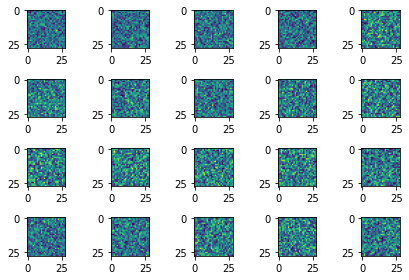

In [10]:
fig=plt.figure()

for node_num in range(len(foldiaklayer.nodes)):
    testbias = []
    connects = np.reshape(network.cgroups[0].npconnects, -1)
    for node in inputlayer.nodes:
        for i in connects:
            if (i.input is node) and (i.output is foldiaklayer.nodes[node_num]):
                testbias.append(i.bias)
    fig.add_subplot(4,5,node_num+1)
            
    plt.imshow(np.array(testbias).reshape((28,28)))
fig.tight_layout()
#plt.savefig("images/2020_07_23_LEB_mnist_mems_0.1_20_changing_p.png")
plt.show()

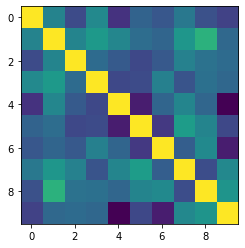

In [9]:
plt.imshow(network.cgroups[1].getbiases())
plt.show()

In [8]:
test = tfds.as_numpy(ds.take(2000))

counts = []
for i in range(10):
    counts.append([])
    for j in range(10):
        counts[i].append(0)

for image, label in test:
    data = image.reshape((-1))/256.0
    inputlayer.setvals(data)
    network.update()
    outlist = []
    for i in foldiaklayer.nodes:
        outlist.append(i.val)
    counts[label] = [a+b for a,b in zip(counts[label],outlist)]

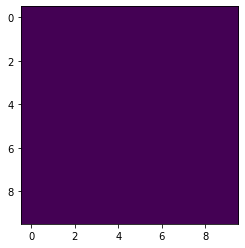

In [9]:
plt.imshow(np.array(counts))
#plt.savefig("images/2020_07_23_LEB_MNIST_classes_10_changing_p.png")
plt.show()